# Домашнее задание №1
## Классификация. Логистическая регрессия, kNN и SVM.


<span style="color: red; font-size: 14pt">  Дедлайн: 24.03.2019 - 23:59 </span>  

Итоговый ноутбук нужно загрузить сюда: [bit.ly/dafe_hw](http://bit.ly/dafe_hw)

На основе [hw1 ml at mipt](https://github.com/ml-mipt/ml-mipt/blob/master/Homeworks/HW_1_Linclass_kNN/HW1_kNN_and_Logistic_regression.ipynb)

### Часть 1. Небольшой numpy-разогрев. (5%)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [152]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

# Ваш код здесь
A = np.random.randint(100, size=(10, 10))

In [153]:
# Посчитайте средние значения в матрице по столбцам

# Ваш код здесь
print(A)
print(np.average(A, axis=0))

[[19 91 24  5 46 65 63 45 99 53]
 [82  6 46  2  1 49  2 29 62 59]
 [39 25  4 47 86 85  1 55 32 66]
 [21 86 45 24  0 72 39 53 87 46]
 [86 41 59 86 94 67 42 54 97 52]
 [31 44 18 51 32 22 44 68 47 90]
 [44 82 79 41 39 46 62 89 85 36]
 [49 14 43 57 52 46 95 60  1 26]
 [56 61 47 62 58 30 67 45 19 75]
 [20 64 39 21 93 41 92 45 15 22]]
[44.7 51.4 40.4 39.6 50.1 52.3 50.7 54.3 54.4 52.5]


In [154]:
# Транспонируйте матрицу A
print(A.T)
# Ваш код здесь

[[19 82 39 21 86 31 44 49 56 20]
 [91  6 25 86 41 44 82 14 61 64]
 [24 46  4 45 59 18 79 43 47 39]
 [ 5  2 47 24 86 51 41 57 62 21]
 [46  1 86  0 94 32 39 52 58 93]
 [65 49 85 72 67 22 46 46 30 41]
 [63  2  1 39 42 44 62 95 67 92]
 [45 29 55 53 54 68 89 60 45 45]
 [99 62 32 87 97 47 85  1 19 15]
 [53 59 66 46 52 90 36 26 75 22]]


In [155]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

# Ваш код здесь
print(A * A.T)

[[ 361 7462  936  105 3956 2015 2772 2205 5544 1060]
 [7462   36 1150  172   41 2156  164  406 3782 3776]
 [ 936 1150   16 2115 5074 1530   79 2365 1504 2574]
 [ 105  172 2115  576    0 3672 1599 3021 5394  966]
 [3956   41 5074    0 8836 2144 1638 2808 5626 4836]
 [2015 2156 1530 3672 2144  484 2024 3128 1410 3690]
 [2772  164   79 1599 1638 2024 3844 8455 5695 3312]
 [2205  406 2365 3021 2808 3128 8455 3600   45 1170]
 [5544 3782 1504 5394 5626 1410 5695   45  361 1125]
 [1060 3776 2574  966 4836 3690 3312 1170 1125  484]]


In [156]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

# Ваш код здесь
B = A @ A
print(B)

[[26416 23278 22479 21195 24901 22717 26080 27130 24319 28461]
 [11652 19145 10079 12035 20065 16528 19961 17249 14798 19064]
 [19816 22135 17343 19838 23860 21358 25199 23414 23703 23408]
 [22047 20975 18259 17620 20827 21444 23158 24718 20034 27060]
 [30230 37190 27035 28756 34959 36036 34826 36177 38940 37080]
 [19104 23388 19538 16671 23078 22253 26977 23749 20999 20274]
 [28851 27439 24242 24422 29362 31142 29582 32413 28994 32151]
 [18547 25031 19599 18403 21627 24352 23638 27203 27804 21354]
 [22836 27750 22136 18682 26121 28431 26473 28225 30486 24894]
 [24392 21099 21516 20383 23236 24050 20964 26377 28451 22993]]


### Часть 2. Решение задачи классификации 95%

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [157]:
all_data = pd.read_csv('../../data/forest_dataset.csv')

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [158]:
from sklearn.model_selection import train_test_split
# Ваш код здесь
all_data, delayed_data = train_test_split(all_data, test_size=0.2, random_state=42)

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [210]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

(8000, 54)


#### 2.1 Двуклассовая классификация (5%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [161]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [162]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = \
                            train_test_split(two_class_feature_matrix, two_class_labels , test_size=0.2, random_state=42)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [163]:
lr_clf = LogisticRegression()

In [164]:
lr_clf.fit(train_feature_matrix, train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [165]:
accuracy_score(lr_clf.predict(test_feature_matrix), test_labels)

0.7638483965014577

In [166]:
f1_score(lr_clf.predict(test_feature_matrix), test_labels)

0.7244897959183674

#### 2.2 Многоклассовая классификация: логистическая регрессия (30%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [209]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = \
                            train_test_split(feature_matrix, labels , test_size=0.2, random_state=42)

(1600, 54)


In [168]:
lr_clf = LogisticRegression(solver='saga', multi_class='multinomial')

# Ваш код здесь

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [169]:
%%time
param_grid={
    'C': np.linspace(0.01, 1, 10), 
    'penalty': ['l1', 'l2']
    }
gs = GridSearchCV(lr_clf, param_grid=param_grid, cv=5,
                n_jobs=-1, scoring='accuracy') 
gs.fit(train_feature_matrix, train_labels)

Wall time: 14.1 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [170]:
x = gs.get_params()['param_grid']['C']

In [171]:
y = gs.cv_results_['mean_test_score'].reshape(len(gs.get_params()['param_grid']['penalty']), 10)

In [181]:
def print_cv_results(a, len_gs, params, param_r, param_sep): 
    d = len(params['param_grid'][param_sep])
    ar=np.array(a).reshape(len_gs,d)
    df=pd.DataFrame(ar)

    pen_par=params['param_grid'][param_sep]
    c_par=params['param_grid'][param_r]
    if type(c_par) != list: 
        c_par = c_par.tolist()
    columns_mapper=dict(zip(range(0, len(pen_par)),pen_par))
    row_mapper=dict(zip(range(0, len(c_par)), c_par))

    df.rename(columns=columns_mapper, index=row_mapper, inplace=True)

    plot = df.plot(title='Mean accuracy rating',grid=True)
    plot.set_xlabel(param_r, fontsize=13)
    plot.set_ylabel('acc', rotation=0, fontsize=13, labelpad=15)

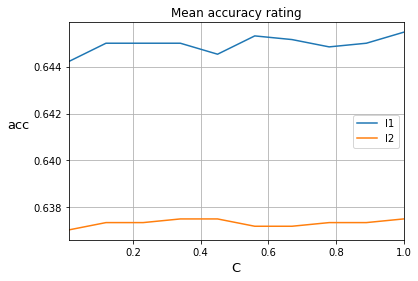

In [182]:
print_cv_results(gs.cv_results_['mean_test_score'],
                 10, gs.get_params(), 'C','penalty')

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [183]:
gs.best_params_

{'C': 1.0, 'penalty': 'l1'}

Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [186]:
%%time
best_lr_clf = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
best_lr_clf.fit(train_feature_matrix, train_labels)
# Ваш код здесь

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 9.62 s


Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [187]:
import collections 
prob = best_lr_clf.predict_proba(test_feature_matrix)
a_pr = np.average(prob, axis=0)

_dict = dict(collections.Counter(train_labels))
_sum = sum(list(_dict.values()))
frequencies = np.array([_dict[key] for key in sorted(_dict)])/_sum
print(a_pr)
print(frequencies)
print(abs(a_pr - frequencies))

[0.36835416 0.49640711 0.05892807 0.00390973 0.01764047 0.03145752
 0.02330296]
[0.3775     0.4790625  0.058125   0.00546875 0.01734375 0.03109375
 0.03140625]
[0.00914584 0.01734461 0.00080307 0.00155902 0.00029672 0.00036377
 0.00810329]


# Итоговые вероятности и частоты почти совпадают

#### 2.3 Многоклассовая классификация: kNN (20%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [188]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k = list(range(1, 11))
param_grid={
    'n_neighbors': k,
    'weights': ['distance', 'uniform']
    }
gs = GridSearchCV(knn, param_grid=param_grid, cv=5,
                n_jobs=-1, scoring='accuracy')
#print(gs.get_params().keys())
gs.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

{'n_neighbors': 1, 'weights': 'distance'}

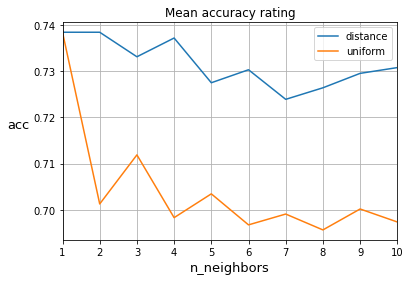

In [191]:
# Ваш код здесь
print_cv_results(gs.cv_results_['mean_test_score'],
                 10, gs.get_params(), 'n_neighbors','weights')
gs.best_params_

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [190]:
%%time
best_knn = KNeighborsClassifier(n_neighbors=gs.best_params_['n_neighbors'], weights=gs.best_params_['weights'])
best_knn.fit(train_feature_matrix, train_labels)

Wall time: 15.6 ms


In [192]:
import collections 
prob = best_knn.predict_proba(test_feature_matrix)
a_pr = np.average(prob, axis=0)

_dict = dict(collections.Counter(train_labels))
_sum = sum(list(_dict.values()))
frequencies = np.array([_dict[key] for key in sorted(_dict)])/_sum
print(a_pr)
print(frequencies)
print(abs(a_pr - frequencies))

[0.360625 0.50875  0.054375 0.005    0.010625 0.033125 0.0275  ]
[0.3775     0.4790625  0.058125   0.00546875 0.01734375 0.03109375
 0.03140625]
[0.016875   0.0296875  0.00375    0.00046875 0.00671875 0.00203125
 0.00390625]


#### 2.4 Метод опорных векторов (30%)

Прежде чем приступить к использованию метода опорных векторов, вспомним что для линейный моделей критично масштабировать данные, для этого воспользуемся `MinMaxScaler`. Не забывайте, что у этого класса сущестуют методы `.fit()`, `.transform()`, `.fit_transform()`. Учитывайте, что данные из отложенной выборки нам недоступны при обучении модели.

In [193]:
from sklearn.preprocessing import MinMaxScaler

In [198]:
scaler = MinMaxScaler(feature_range=(0, 1))
# print(scaler.fit(train_feature_matrix))
train_feature_matrix_scaled = scaler.fit_transform(train_feature_matrix)
test_feature_matrix_scaled = scaler.fit_transform(test_feature_matrix)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Обучим классификатор

In [199]:
from sklearn.svm import SVC

In [202]:
%%time
svc = SVC()
param_grid={
    'C': np.linspace(0.01, 1, 10),
    'kernel': ['linear', 'rbf']
    }
gs = GridSearchCV(svc, param_grid=param_grid, cv=5,
                n_jobs=-1, scoring='accuracy')
#print(gs.get_params().keys())
gs.fit(train_feature_matrix_scaled, train_labels)

Wall time: 37 s


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `C` и `kernel`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `kernel` - `['linear', 'rbf']`. Критерий качества `scoring = 'accuracy'`.

Постройте графики средних значений критерия качества accuracy для типов ядер `linear` и `rbf`,  в зависимости от коэффициента `C`.

_Подсказка:_ Если метод учится слишком долго, попробуйте ограничить кол-во итераций (`max_iter`) и/или увеличить параметр останова`tol`

{'C': 1.0, 'kernel': 'linear'}

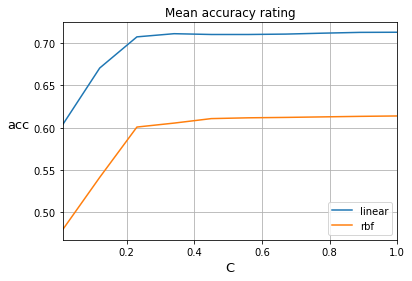

In [203]:
print_cv_results(gs.cv_results_['mean_test_score'],
                 10, gs.get_params(), 'C','kernel')
gs.best_params_

In [204]:
%%time
best_svc = SVC(C=gs.best_params_['C'], kernel=gs.best_params_['kernel'])
best_svc.fit(train_feature_matrix_scaled, train_labels)

Wall time: 1.54 s


#### 2.5 Сравнение результатов логистической регрессии, kNN и SVC (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии, лучшего kNN и лучшей модели SVM  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [222]:
delayed_data
labels = delayed_data[delayed_data.columns[-1]].values
feature_matrix = delayed_data[delayed_data.columns[:-1]].values

feature_matrix_scaled = scaler.fit_transform(feature_matrix)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [228]:
accuracy_score(best_lr_clf.predict(feature_matrix), labels)

0.705

In [232]:
accuracy_score(best_knn.predict(feature_matrix), labels)

0.7525

In [233]:
accuracy_score(best_svc.predict(feature_matrix_scaled), labels)

0.6635